In [1]:
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Sistema de ecuaciones diferenciales

\begin{equation} \label{eq1}
\begin{split}
\dfrac{V_{B}}{dt}  &= \kappa_{LB}V_{LT-IS} - \left( C_{B} + \kappa_{LB}\right)V_B \\
\dfrac{V_{LT - IS}}{dt}  &= S_L - \left( C_{LT} + \kappa_{LB} + \kappa_{LF}\right)V_{LT-IS} + \kappa_{FL}V_{F} \\
\dfrac{V_F}{dt}   &= \kappa_{LF}V_{LT-IS} - \left( \kappa_{FL} + C_F \right)V_F
\end{split}
\end{equation}

donde $S_L = Te^{-\delta_1 t} +  Me^{-\delta_2 t}$ y $G = \dfrac{T}{M}$

Ahora definimos el campo vectorial a integrar, donde `V = [VB, VL, VF]`

In [2]:
def campoVectorial(V, t, KLB, CB, CLT, KLF, KFL, T, M, d1, d2):
    ### Recordemos que KBL = 0 y CF = 0 ##
    KBL, CF = 0, 0
    
    SL = T*exp(-d1*t) + M*exp(-d2*t)
    
    dVB = KLB*V[1] - (CB + KBL)*V[0]
    
    dVL = SL - (CLT + KLB + KLF)*V[1] + KFL*V[2]
    
    dVF = KLF*V[1] - (KFL + CF)*V[2]
    
    return [dVB, dVL, dVF]

Definimos el tiempo de integración

In [3]:
t = linspace(0, 25, 251)

Definimos las condiciones iniciales

In [4]:
condinit = [1.0, 20.0, 80.0]

Los argumentos del campo vectorial de va a proporcionar ` KLB, CB, CLT, KLF, KFL, T, M, d1, d2`

## Gráfica de $V_B$ en función del $Tiempo$ para diferente $C_B$ 

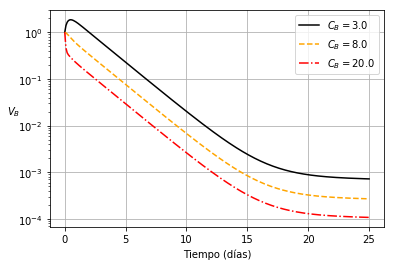

In [5]:
j = 0
f = plt.figure()
for i in (3.0 , 8.0, 20.0):
    C = ("black", "orange", "red")
    B = ("solid", "dashed", "dashdot")
    sol = odeint(campoVectorial, condinit, t, args=(0.4, i , 2.5, 0.033, 0.5, 50/51, 1/51, 0.5, 0.01 ))
    #a = r'$C_B = %s $' % i
    plt.semilogy(t, sol[:, 0], color = C[j], linestyle = B[j] , label =  r'$C_B = %s $' % i)
    plt.ylabel(r'$V_B$', rotation = 0) 
    plt.xlabel("Tiempo (días)")
    plt.grid(True)
    plt.legend()
    j += 1 
plt.show()
f.savefig("VB_timea.pdf")

## Gráfica de $V_B$ en función del $Tiempo$ para diferente $\kappa_{FL}$

Los argumentos del campo vectorial de va a proporcionar ` KLB, CB, CLT, KLF, KFL, T, M, d1, d2`

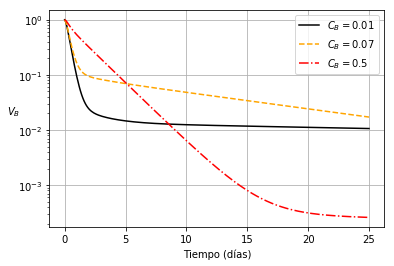

In [6]:
j = 0
f = plt.figure()
for i in (0.01 , 0.07, 0.5):
    C = ("black", "orange", "red")
    B = ("solid", "dashed", "dashdot")
    sol = odeint(campoVectorial, condinit, t, args=(0.5, 10.0 , 2.5, 0.033, i, 50/51, 1/51, 0.5, 0.01 ))
    #a = r'$C_B = %s $' % i
    plt.semilogy(t, sol[:, 0], color = C[j], linestyle = B[j] , label =  r'$C_B = %s $' % i)
    plt.ylabel(r'$V_B$', rotation = 0) 
    plt.xlabel("Tiempo (días)")
    plt.grid(True)
    plt.legend()
    j += 1 
plt.show()
f.savefig("VB_timeb.pdf")

## Gráfica de $V_{LT}$ en función del $Tiempo$ para diferente $\kappa_{FL}$

donde $V_{LT} = V_{LT- IS} + V_F$

Los argumentos del campo vectorial de va a proporcionar ` KLB, CB, CLT, KLF, KFL, T, M, d1, d2`

In [7]:
t = linspace(0, 160, 16001)

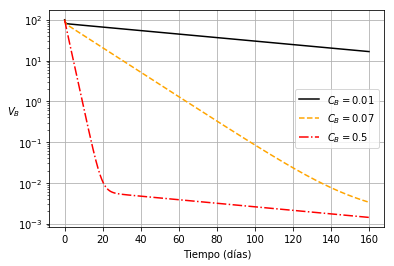

In [8]:
j = 0
f = plt.figure()
for i in (0.01 , 0.07, 0.5):
    C = ("black", "orange", "red")
    B = ("solid", "dashed", "dashdot")
    sol = odeint(campoVectorial, condinit, t, args=(0.5, 10.0 , 2.5, 0.033, i, 50/51, 1/51, 0.5, 0.01 ))
    #a = r'$C_B = %s $' % i
    plt.semilogy(t, sol[:, 1] + sol[:, 2], color = C[j], linestyle = B[j] , label =  r'$C_B = %s $' % i)
    plt.ylabel(r'$V_B$', rotation = 0) 
    plt.xlabel("Tiempo (días)")
    plt.grid(True)
    plt.legend()
    j += 1 
plt.show()
f.savefig("VLT_timec.pdf")

## Gráfica de $V_{LT}$ en función del $Tiempo$ para diferente $G = \frac{T}{M}$

donde $V_{LT} = V_{LT- IS} + V_F$

Los argumentos del campo vectorial de va a proporcionar ` KLB, CB, CLT, KLF, KFL, T, M, d1, d2`

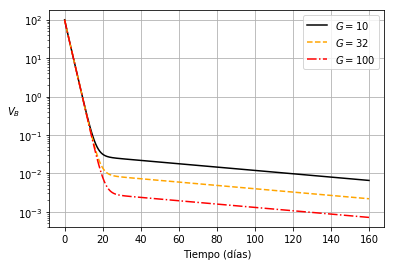

In [9]:
#j = 0
f = plt.figure()
T = (10.0/11.0, 32.0/33.00, 100.0/101.0)
M = (1.0/11.0, 1.0/33.00, 1.0/101.0)
for i in range(0 , 3):
    C = ("black", "orange", "red")
    B = ("solid", "dashed", "dashdot")
    sol = odeint(campoVectorial, condinit, t, args=(0.5, 10.0 , 2.5, 0.033, 0.5, T[i], M[i], 0.5, 0.01 ))
    cociente =  int(T[i]/M[i])
    plt.semilogy(t, sol[:, 1] + sol[:, 2], color = C[i], linestyle = B[i] , label =  r'$G = %s $' % cociente)
    plt.ylabel(r'$V_B$', rotation = 0) 
    plt.xlabel("Tiempo (días)")
    plt.grid(True)
    plt.legend()
    #j += 1 
plt.show()
f.savefig("VLT_timed.pdf")